In [1]:
import pandas as pd

from ccsblib import paros_connection

import isolib
from data_loading import load_annotated_6k_collection, load_annotated_gencode_tfs, load_valid_isoform_clones, load_isoform_and_paralog_y2h_data

In [2]:
clones = load_valid_isoform_clones()

In [3]:
clones.loc[clones['gene'].str.startswith('W'), :]

,gene,clone_acc,aa_seq,num_aa,is_novel_isoform
522,WT1,WT1|1/6|12B12,MQDPASTCVPEPASQHTLRSGPGCLQQPEQQGVRDPGGIWAKLGAA...,517,True
523,WT1,WT1|2/6|12C12,MQDPASTCVPEPASQHTLRSGPGCLQQPEQQGVRDPGGIWAKLGAA...,497,True
525,WT1,WT1|4/6|12A11,MEKGYSTVTFDGTPSYGHTPSHHAAQFPNHSFKHEDPMGQQGSLGE...,302,False
527,WT1,WT1|6/6|10G06,MEKGYSTVTFDGTPSYGHTPSHHAAQFPNHSFKHEDPMGQQGSLGE...,288,False


In [4]:
tfs_us = load_annotated_6k_collection()
tfs_gc = load_annotated_gencode_tfs()

100%|██████████| 2748/2748 [01:25<00:00, 32.03it/s]


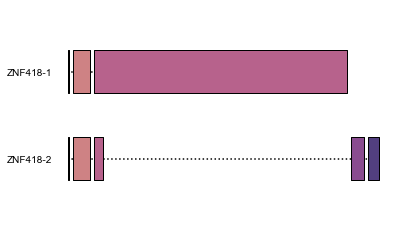

In [133]:
tfs_us['ZNF418'].exon_diagram()

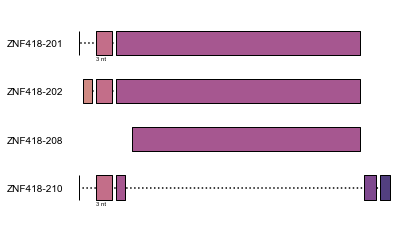

In [134]:
tfs_gc['ZNF418'].exon_diagram()

In [132]:
clones.loc[clones['gene'] == 'ZNF418', :]

,gene,clone_acc,aa_seq,num_aa,is_novel_isoform
679,ZNF418,ZNF418|1/2|12H05,MQGTVAFEDVAVNFSQEEWSLLSEVQRCLYHDVMLENWVLISSLGC...,676,False
680,ZNF418,ZNF418|2/2|04G04,MQGTVAFEDVAVNFSQEEWSLLSEVQRCLYHDVMLENWVLISSLGC...,128,False


In [136]:
clones['gene'].nunique()

310

In [130]:
(len(tfs_us['E2F3']['E2F3-2'].aa_seq), 
 len(tfs_gc['E2F3']['E2F3-202'].aa_seq))

(340, 334)

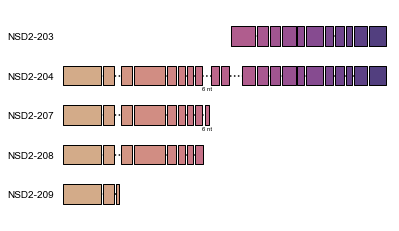

In [14]:
tfs_gc['NSD2'].exon_diagram()

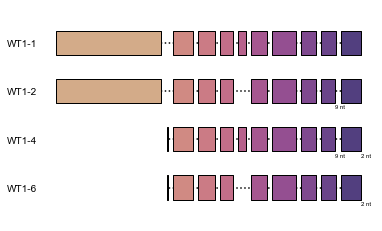

In [86]:
tfs_us['WT1'].exon_diagram()

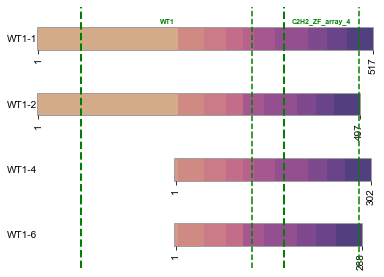

In [87]:
tfs_us['WT1'].protein_diagram()

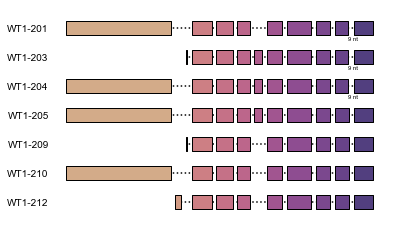

In [88]:
tfs_gc['WT1'].exon_diagram()

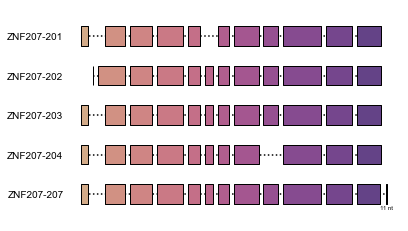

In [10]:
tfs_gc['ZNF207'].exon_diagram()

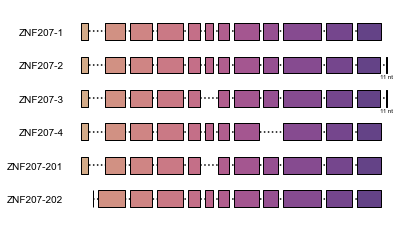

In [15]:
from matplotlib import pyplot as plt
tfs['ZNF207'].exon_diagram()
plt.savefig('/Users/lukelambourne/Desktop/ZNF207_combined_exon_diagram.pdf',
            bbox_inches='tight')

In [5]:
tfs = {}
# HACK
for gene_name in tfs_gc.keys():
    if gene_name in tfs_us:
        try:
            tfs[gene_name] = isolib.Gene(gene_name,
                                        tfs_us[gene_name].orfs +
                                        [gc_orf for gc_orf in tfs_gc[gene_name].orfs
                                        if gc_orf.aa_seq not in 
                                        {clone.aa_seq for clone in tfs_us[gene_name].orfs}
                                        and gc_orf.name != 'WT1-203'])
        except ValueError:
            print(gene_name, 'failed')
            continue
    else:
        tfs[gene_name] = tfs_gc[gene_name]

HSFY1 failed


In [261]:
tfs_us['ZNF718']

Gene: ZNF718
Isoforms: ['ZNF718-1']

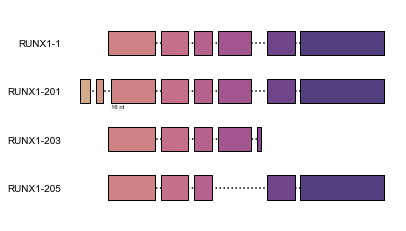

In [262]:
tfs['RUNX1'].exon_diagram()

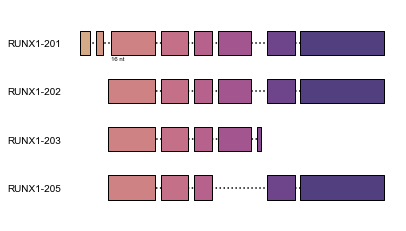

In [12]:
tfs_gc['RUNX1'].exon_diagram()

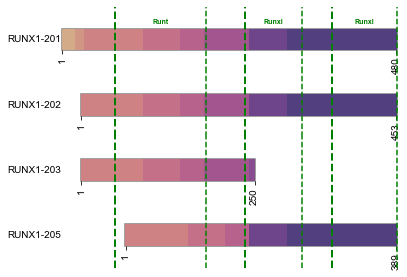

In [17]:
tfs_gc['RUNX1'].protein_diagram()

In [16]:
clones.loc[clones['gene'] == 'ZNF718', :]

,gene,clone_acc,aa_seq,num_aa,is_novel_isoform
762,ZNF718,ZNF718|1/2|11C11,MELLTFKDVAIEFSPEEWKCLDTSQQNLYRDVMLENYRNLVSLGVS...,478,False


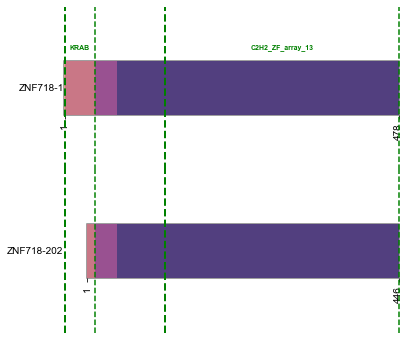

In [13]:
tfs['ZNF718'].protein_diagram()

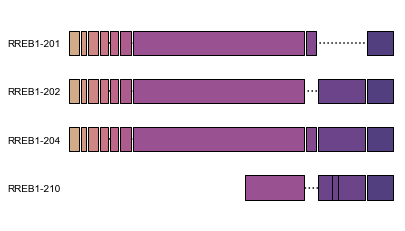

In [264]:
tfs['RREB1'].exon_diagram()

In [10]:
tfs['RREB1']['RREB1-204'].aa_seq_features

[Pfam_domain: PF00096 zf-C2H2 316-338,
 Pfam_domain: PF00096 zf-C2H2 753-775,
 Pfam_domain: PF00096 zf-C2H2 790-813,
 Pfam_domain: PF00096 zf-C2H2 1448-1470,
 ZF_array: C2H2_ZF_array_3 C2H2_ZF_array_3 66-147,
 ZF_array: C2H2_ZF_array_2 C2H2_ZF_array_2 208-258,
 ZF_array: C2H2_ZF_array_3 C2H2_ZF_array_3 643-722,
 ZF_array: C2H2_ZF_array_2 C2H2_ZF_array_2 1246-1297,
 ZF_array: C2H2_ZF_array_2 C2H2_ZF_array_2 1567-1617,
 DBD_flank: PF00096_flank_N N_DBD_flank 301-315,
 DBD_flank: PF00096_flank_C C_DBD_flank 339-353,
 DBD_flank: PF00096_flank_N N_DBD_flank 738-752,
 DBD_flank: PF00096_flank_C C_DBD_flank 776-790,
 DBD_flank: PF00096_flank_N N_DBD_flank 775-789,
 DBD_flank: PF00096_flank_C C_DBD_flank 814-828,
 DBD_flank: PF00096_flank_N N_DBD_flank 1433-1447,
 DBD_flank: PF00096_flank_C C_DBD_flank 1471-1485,
 DBD_flank: C2H2_ZF_array_3_flank_N N_DBD_flank 51-65,
 DBD_flank: C2H2_ZF_array_3_flank_C C_DBD_flank 148-162,
 DBD_flank: C2H2_ZF_array_2_flank_N N_DBD_flank 193-207,
 DBD_flank: C2

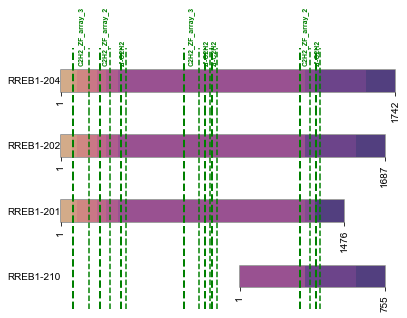

In [11]:
# RREB-204 is the reference
tfs['RREB1'].protein_diagram(isoform_order=['RREB1-204',
    'RREB1-202',
    'RREB1-201',
    'RREB1-210'],
     domain_label_rotation=90)

In [256]:
last = 0
for i, e in enumerate(tfs['ZNF207']['ZNF207-201'].exons):
    print(i + 1, last, last + len(e) / 3)
    last += len(e) / 3

1 0 13.666666666666666
2 13.666666666666666 56.0
3 56.0 102.33333333333334
4 102.33333333333334 158.33333333333334
5 158.33333333333334 183.66666666666669
6 183.66666666666669 207.33333333333334
7 207.33333333333334 260.0
8 260.0 291.0
9 291.0 372.0
10 372.0 425.3333333333333
11 425.3333333333333 478.0


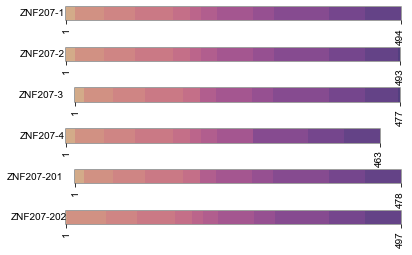

In [36]:
tfs['ZNF207'].protein_diagram()

In [113]:
clones.loc[clones['gene'] == 'WT1']

,gene,clone_acc,aa_seq,num_aa,is_novel_isoform
522,WT1,WT1|1/6|12B12,MQDPASTCVPEPASQHTLRSGPGCLQQPEQQGVRDPGGIWAKLGAA...,517,True
523,WT1,WT1|2/6|12C12,MQDPASTCVPEPASQHTLRSGPGCLQQPEQQGVRDPGGIWAKLGAA...,497,True
525,WT1,WT1|4/6|12A11,MEKGYSTVTFDGTPSYGHTPSHHAAQFPNHSFKHEDPMGQQGSLGE...,302,False
527,WT1,WT1|6/6|10G06,MEKGYSTVTFDGTPSYGHTPSHHAAQFPNHSFKHEDPMGQQGSLGE...,288,False


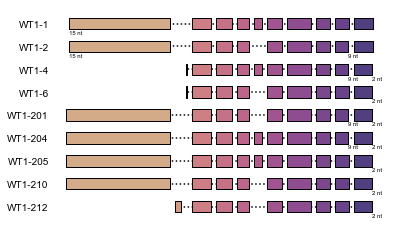

In [107]:
# 203 should not be there...
tfs['WT1'].exon_diagram()
plt.savefig('/Users/lukelambourne/Desktop/WT1_combined_exon_diagram.pdf',
            bbox_inches='tight')

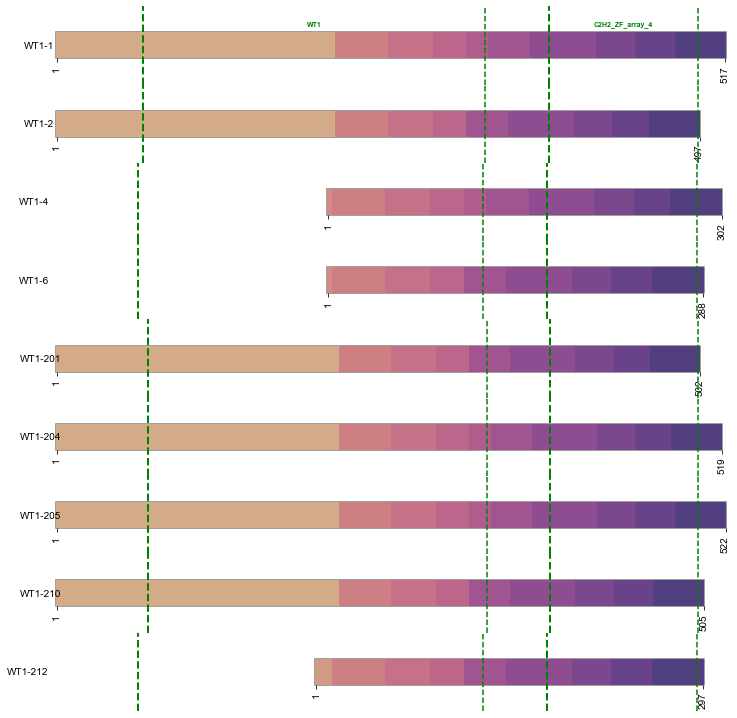

In [138]:
plt.gcf().set_size_inches(12, 12)
tfs['WT1'].protein_diagram()

In [246]:
tfs['WT1']['WT1-210'].aa_seq[400:420]

'RKHTGEKPYQCDFKDCERRF'

In [114]:
df = pd.read_excel('../../data/processed/Nathans_analysis/Breast_cancer/DATASET-PAM50-TPM.xlsx')

In [122]:
df.loc[df['Ensembl_gene'].str.contains('WT1'), df.columns[:7]]

,Ensembl_gene,avg-controls,avg-Luminal B,avg-Basal-like,avg-HER2-enriched,avg-Luminal A,avg-Normal-like
1850,WT1-201,0.090950,0.664383,0.400298,0.686676,0.335236,0.340265
2016,WT1-212,0.062826,0.521875,0.235072,0.517502,0.224628,0.178301
2451,WT1-205,0.060573,0.448518,0.226400,0.394987,0.200404,0.286852
2689,WT1__3--6__12A12_ENSP00000368370__WT1__4--6__1...,0.063696,0.400655,0.134739,0.329604,0.181990,0.047476
3590,WT1__6--6__10G06_ENSP00000435307,0.020175,0.078837,0.031790,0.076908,0.035729,0.084757
4250,WT1-210,0.000467,0.002959,0.000332,0.000246,0.000425,0.000000
4268,WT1__1--6__12B12_NA_NA,0.000598,0.001669,0.000000,0.000000,0.000000,0.000000
4376,WT1-204,0.000847,0.000460,0.000046,0.001964,0.001559,0.000000
4433,WT1__2--6__12C12_NA_NA,0.000000,0.000157,0.000000,0.000000,0.000000,0.000000


In [104]:
tfs['WT1']['WT1-203'].name

'WT1-203'

In [99]:
tfs['WT1']['WT1-4'].aa_seq

'MEKGYSTVTFDGTPSYGHTPSHHAAQFPNHSFKHEDPMGQQGSLGEQQYSVPPPVYGCHTPTDSCTGSQALLLRTPYSSDNLYQMTSQLECMTWNQMNLGATLKGVAAGSSSSVKWTEGQSNHSTGYESDNHTTPILCGAQYRMHTHGVFRGIQDVRRVPGVAPTLVRSASETSEKRPFMCAYPGCNKRYFKLSHLQMHSRKHTGEKPYQCDFKDCERRFSRSDQLKRHQRRHTGVKPFQCKTCQRKFSRSDHLKTHTRTHTGEKPFSCRWPSCQKKFARSDELVRHHNMHQRNMTKLQLAL'

In [96]:
'MEKGYSTVTFDGTPSYGHTPSHHAAQFPNHSFKHEDPMGQQGSLGEQQYSVPPPVYGCHTPTDSCTGSQALLLRTPYSSDNLYQMTSQLECMTWNQMNLGATLKGVAAGSSSSVKWTEGQSNHSTGYESDNHTTPILCGAQYRIHTHGVFRGIQDVRRVPGVAPTLVRSASETSEKRPFMCAYPGCNKRYFKLSHLQMHSRKHTGEKPYQCDFKDCERRFSRSDQLKRHQRRHTGVKPFQCKTCQRKFSRSDHLKTHTRTHTGEKPFSCRWPSCQKKFARSDELVRHHNMHQRNMTKLQLAL' == 'MEKGYSTVTFDGTPSYGHTPSHHAAQFPNHSFKHEDPMGQQGSLGEQQYSVPPPVYGCHTPTDSCTGSQALLLRTPYSSDNLYQMTSQLECMTWNQMNLGATLKGVAAGSSSSVKWTEGQSNHSTGYESDNHTTPILCGAQYRMHTHGVFRGIQDVRRVPGVAPTLVRSASETSEKRPFMCAYPGCNKRYFKLSHLQMHSRKHTGEKPYQCDFKDCERRFSRSDQLKRHQRRHTGVKPFQCKTCQRKFSRSDHLKTHTRTHTGEKPFSCRWPSCQKKFARSDELVRHHNMHQRNMTKLQLAL'

False

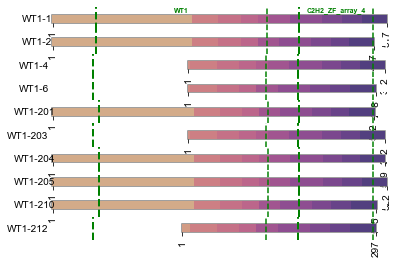

In [91]:
tfs['WT1'].protein_diagram()

In [37]:
tfs_us['ZNF207'].protein_diagram()

IndexError: list index out of range

In [24]:
# Use N2H data to see if there are any Y2H genes totally validated
def load_n2h_data():
    y2h = load_isoform_and_paralog_y2h_data()
    qry = """SELECT a.test_orf_ida,
        a.test_orf_idb,
        b.iso_orf_id,
        b.huri_orf_id,
        b.source,
        a.call_1_percent_RRS AS result,
        a.final_score,
        c.score,
        c.empty_n1, c.empty_n2
            FROM tf_validation.validation AS a
            LEFT JOIN tf_validation.validation_source AS b
            ON (a.test_orf_ida = b.orf_id1
                AND a.test_orf_idb = b.orf_id2)
            OR (a.test_orf_idb = b.orf_id1
                AND a.test_orf_ida = b.orf_id2)
            LEFT JOIN (select j.score_id, j.score, 
                                k.empty_n1, k.empty_n2 
                                from tf_validation.mn2h_scoring AS j
                                left join tf_validation.mn2h_control AS k
                                using (plate, well)) AS c
            on a.final_score_id = c.score_id;"""
    n2h = pd.read_sql(qry, paros_connection())
    n2h['max_control'] = n2h[['empty_n1', 'empty_n2']].max(axis=1)
    #n2h['non_zero_iso'] = n2h['iso_orf_id'].isin(non_zero_iso)
    n_rows_b4 = n2h.shape[0]
    n2h = pd.merge(n2h,
                   y2h.loc[y2h['category'].isin({'tf_isoform_ppis', 
                                            'tf_paralog_ppis',
                                            'paralog_with_PDI',
                                            'non_paralog_control'}),
                    ['ad_orf_id',
                    'db_orf_id',
                    'ad_gene_symbol',
                    'ad_clone_acc',
                    'db_gene_symbol',
                    'category',
                    'score']],
            how='left',
            left_on=['iso_orf_id', 'huri_orf_id'],
            right_on=['ad_orf_id', 'db_orf_id'],
            suffixes=('_n2h', '_y2h'))
    if n2h.shape[0] != n_rows_b4:
        raise UserWarning('Problem with table join')
    return n2h

n2h = load_n2h_data()
n2h.head()

,test_orf_ida,test_orf_idb,iso_orf_id,huri_orf_id,source,result,final_score,score_n2h,empty_n1,empty_n2,max_control,ad_orf_id,db_orf_id,ad_gene_symbol,ad_clone_acc,db_gene_symbol,category,score_y2h
0,35,14210,NaN,NaN,lit_bm_2013_rand250,0.0,0.337079,30,13,89,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,11100,NaN,NaN,lit_bm_2013_rand250,0.0,0.935484,29,21,31,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66,101217,101217.0,66.0,neg,0.0,0.120000,18,14,150,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107,9628,NaN,NaN,lit_bm_2013_rand250,0.0,0.783217,224,25,286,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,107,14170,NaN,NaN,lit_bm_2013_rand250,0.0,0.564706,96,19,170,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
n2h['ad_gene_symbol'].value_counts().head(15)

TCF4      42
TCF12     16
IKZF2     14
RFX4      11
TFCP2     11
ZBTB44    10
NFIX       9
ZNF451     7
MEIS2      6
HOMEZ      6
SOX6       6
RELA       5
FOXP2      5
ZNF263     4
ZNF212     4
Name: ad_gene_symbol, dtype: int64

In [31]:
y2h = load_isoform_and_paralog_y2h_data()

In [36]:
(n2h['ad_gene_symbol'].value_counts() / y2h.loc[y2h['category'] == 'tf_isoform_ppis', 'ad_gene_symbol'].value_counts()).sort_values(ascending=False).head(10)

ZNF449     1.50
SALL3      1.00
SOX15      1.00
RORC       1.00
NFIX       0.75
LHX6       0.50
ZSCAN25    0.50
CREB1      0.50
RARB       0.50
NR2F2      0.50
Name: ad_gene_symbol, dtype: float64

In [63]:
n2h.loc[(n2h['category'] == 'tf_isoform_ppis') & 
        (n2h['ad_gene_symbol'] == 'TCF4'), :].sort_values(['db_gene_symbol', 'ad_clone_acc'])

,test_orf_ida,test_orf_idb,iso_orf_id,huri_orf_id,source,result,final_score,score_n2h,empty_n1,empty_n2,max_control,ad_orf_id,db_orf_id,ad_gene_symbol,ad_clone_acc,db_gene_symbol,category,score_y2h
613,54749,100455,100455.0,54749.0,pos,0.0,0.413793,12,29,16,29,100455.0,54749.0,TCF4,TCF4|1/9|07E01,A1CF,tf_isoform_ppis,1
612,54749,100313,100313.0,54749.0,pos-matched-neg,0.0,0.464286,13,28,11,28,100313.0,54749.0,TCF4,TCF4|8/9|07A05,A1CF,tf_isoform_ppis,0
579,53432,100703,100703.0,53432.0,neg,0.0,1.098039,56,28,51,51,100703.0,53432.0,TCF4,TCF4|5/9|07C02,ARL16,tf_isoform_ppis,0
661,56899,100703,100703.0,56899.0,neg,0.0,1.375796,216,58,157,157,100703.0,56899.0,TCF4,TCF4|5/9|07C02,BCL2L15,tf_isoform_ppis,0
371,9640,100313,100313.0,9640.0,pos-matched-neg,0.0,1.255639,167,46,133,133,100313.0,9640.0,TCF4,TCF4|8/9|07A05,CDC20B,tf_isoform_ppis,0
918,100009829,100455,100455.0,100009829.0,pos,0.0,1.314132,1711,48,1302,1302,100455.0,100009829.0,TCF4,TCF4|1/9|07E01,CDC37,tf_isoform_ppis,1
217,4920,100455,100455.0,4920.0,pos,0.0,0.480769,25,52,24,52,100455.0,4920.0,TCF4,TCF4|1/9|07E01,CKS1B,tf_isoform_ppis,1
218,4920,100565,100565.0,4920.0,pos,0.0,0.482759,14,29,20,29,100565.0,4920.0,TCF4,TCF4|3/9|07C04,CKS1B,tf_isoform_ppis,1
216,4920,100313,100313.0,4920.0,pos,0.0,0.666667,22,33,20,33,100313.0,4920.0,TCF4,TCF4|8/9|07A05,CKS1B,tf_isoform_ppis,1
435,11535,100247,100247.0,11535.0,neg,0.0,0.615385,16,26,22,26,100247.0,11535.0,TCF4,TCF4|6/9|07H03,COA5,tf_isoform_ppis,0


In [40]:
n2h.loc[n2h['category'] == 'tf_isoform_ppis', 'ad_gene_symbol'].value_counts()

TCF4       38
IKZF2      12
ZBTB44      7
TCF12       7
ZNF451      7
HOMEZ       6
FOXP2       5
HMBOX1      4
PBX1        4
ZNF212      4
PRRX1       4
REL         3
GRHL3       3
FOS         3
FOXN4       3
E2F3        3
SOX6        3
RELA        3
ZNF263      2
ZBTB32      2
MEOX1       2
ESRRG       2
NFIA        2
MAX         2
NFE2L2      2
MEIS2       2
RFX4        2
ZSCAN9      2
FOSB        2
PATZ1       2
RORC        2
ZNF143      1
PPARG       1
PAX5        1
NR4A1       1
SOX5        1
ARNTL2      1
ZBTB16      1
ZBTB1       1
SOX15       1
ZBTB18      1
ZNF438      1
TP63        1
ZSCAN18     1
CREB3L3     1
HOXA1       1
PCGF6       1
KLF4        1
MITF        1
GLI1        1
POU2F1      1
ARNTL       1
TEAD2       1
RARG        1
ZNF180      1
ATF2        1
SMAD4       1
ZSCAN32     1
SALL3       1
TFCP2       1
Name: ad_gene_symbol, dtype: int64

In [64]:
n2h.dropna()

,test_orf_ida,test_orf_idb,iso_orf_id,huri_orf_id,source,result,final_score,score_n2h,empty_n1,empty_n2,max_control,ad_orf_id,db_orf_id,ad_gene_symbol,ad_clone_acc,db_gene_symbol,category,score_y2h
10,130,101170,101170.0,130.0,pos-matched-neg,0.0,2.440299,654,38,268,268,101170.0,130.0,ZNF451,ZNF451|5/8|05A12,TRIM21,tf_isoform_ppis,0
11,130,101179,101179.0,130.0,pos,0.0,5.991935,1486,45,248,248,101179.0,130.0,ZNF451,ZNF451|4/8|06H02,TRIM21,tf_isoform_ppis,1
13,172,100746,100746.0,172.0,pos,0.0,1.840909,81,44,35,44,100746.0,172.0,RFX4,RFX4|2/3|10D02,CCNK,tf_isoform_ppis,1
20,501,100208,100208.0,501.0,pos-matched-neg,0.0,0.652174,15,20,23,23,100208.0,501.0,TCF12,TCF12|3/3|07B07,RBM8A,tf_isoform_ppis,0
21,525,100496,100496.0,525.0,neg,0.0,0.186916,20,21,107,107,100496.0,525.0,ZSCAN9,ZSCAN9|2/3|08H02,ZNF250,tf_isoform_ppis,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,100068995,100698,100698.0,100068995.0,neg,0.0,1.270270,47,21,37,37,100698.0,100068995.0,DDIT3,DDIT3|2/2|05G05,MSGN1,non_paralog_control,AA
960,100069795,100496,100496.0,100069795.0,neg,0.0,3.542857,124,35,13,35,100496.0,100069795.0,ZSCAN9,ZSCAN9|2/3|08H02,ZSCAN23,tf_paralog_ppis,0
963,100069883,101248,101248.0,100069883.0,pos,0.0,0.274678,64,233,18,233,101248.0,100069883.0,ZSCAN18,ZSCAN18|1/7|09F02,ZNF48,tf_isoform_ppis,1
966,100070143,100208,100208.0,100070143.0,pos-matched-neg,0.0,0.700000,21,13,30,30,100208.0,100070143.0,TCF12,TCF12|3/3|07B07,HSF2BP,tf_paralog_ppis,0


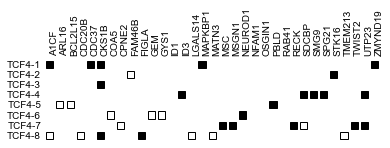

In [84]:
import numpy as np
from plotting import isoform_display_name, binary_profile_matrix, strikethrough


def ppi_per_tf_gene_plot(gene_name,
                             data,
                             ax=None,
                             result_column='score',
                             min_n_isoforms=1,
                             min_n_partners=1):
    tf = data.loc[(data['category'] == 'tf_isoform_ppis') &
                (data['ad_gene_symbol'] == gene_name),
                ['ad_clone_acc', 'db_gene_symbol', result_column]].copy()
    if tf[result_column].dtype == np.object:
        tf[result_column] = tf[result_column].map({'1': True,
                                    '0': False,
                                    'AA': np.nan,
                                    'NC': np.nan})
    elif tf[result_column].dtype == np.float64:
        tf[result_column] = tf[result_column].astype(bool)
    tf['ad_clone_acc'] = tf['ad_clone_acc'].apply(isoform_display_name)
    tf = tf.pivot(index='ad_clone_acc',
                  columns='db_gene_symbol',
                  values=result_column)
    if ax is None:
        ax = plt.gca()
    if tf.shape[0] < min_n_isoforms or tf.shape[1] < min_n_partners:
        ax.set_axis_off()
        ax.text(0.5, 0.5,
                'No PPI data available',
                ha='center', va='center',
                fontsize=30,
                fontweight='bold',
                color='grey')
        return
    binary_profile_matrix(tf, ax=ax, column_label_rotation=90)
    ax.set_yticklabels([strikethrough(name) if all_na else name
                        for name, all_na in tf.isnull().all(axis=1).iteritems()])


ppi_per_tf_gene_plot('TCF4', data=n2h.dropna(), result_column='score_y2h')

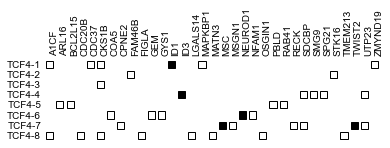

In [85]:
ppi_per_tf_gene_plot('TCF4', data=n2h.dropna(), result_column='result')

False    567
True     191
Name: is_novel_isoform, dtype: int64


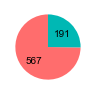

In [187]:
print(clones['is_novel_isoform'].value_counts())
fig = plt.gcf()
fig.set_size_inches(1.5, 1.5)
(clones['is_novel_isoform'].value_counts().plot
.pie(startangle=90,
autopct=lambda x: int(x / 100 * clones.shape[0]),
colors=['#FF6D6D', '#00B8B4'],
labels=['', '']))
plt.ylabel('')
plt.savefig('../../figures/for_Marthas_CSBC_talk_2020-09-16/novel-isoforms_pie.pdf',
            bbox_inches='tight')

In [160]:
# DBD affected in breast cancer
tfs = load_annotated_gencode_tfs()

100%|██████████| 2748/2748 [01:20<00:00, 34.03it/s]


In [167]:
from data_loading import load_DNA_binding_domains, load_pfam_clans

In [235]:
def get_longest_isoform(gene):
    return list(sorted(gene.orfs, key=lambda x: len(x.aa_seq), reverse=True))[0].name


get_longest_isoform(tfs['ATF2'])

'ATF2-201'

In [236]:
clans = load_pfam_clans()
df = pd.concat([g.aa_feature_disruption(get_longest_isoform(g)) for g in tfs.values()])
dbd = load_DNA_binding_domains()
dbd['clan'] = dbd['pfam'].map(clans)
dbd['num_genes'] = dbd['pfam'].map(df.groupby('accession')['gene'].size())
df['is_DBD'] = df['accession'].isin(dbd['pfam'].values) | df['accession'].str.startswith('C2H2_ZF_array')
df['is_affected'] = (df['deletion'] + df['insertion'] + df['frameshift']) > 0

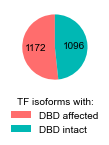

In [237]:
fig = plt.gcf()
fig.set_size_inches(1.5, 1.5)
(df.loc[df['is_DBD'], :]
.groupby('alt_iso')
['is_affected'].any()
.value_counts()
.plot.pie(startangle=90,
autopct=lambda x: int(x / 100 * df.loc[df['is_DBD'], 'alt_iso'].nunique()),
colors=['#FF6D6D', '#00B8B4'],
labels=[' ', ' ']))
plt.legend(labels=['DBD affected', 'DBD intact'],
           title='TF isoforms with:',
           frameon=False,
           loc='upper center',
           bbox_to_anchor=[0.5, 0],
           )
plt.ylabel('')
plt.savefig('../../figures/for_Marthas_CSBC_talk_2020-09-16/DBD-affected_GENCODE-TFs_pie.pdf',
            bbox_inches='tight')

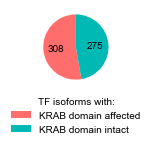

In [238]:
fig = plt.gcf()
fig.set_size_inches(1.5, 1.5)
(df.loc[(df['accession'] == 'PF01352'), :]
.groupby('alt_iso')
['is_affected'].any()
.value_counts()
.plot.pie(startangle=90,
autopct=lambda x: int(x / 100 * df.loc[(df['accession'] == 'PF01352'), 'alt_iso'].nunique()),
colors=['#FF6D6D', '#00B8B4'],
labels=[' ', ' ']))
plt.legend(labels=['KRAB domain affected', 'KRAB domain intact'],
           title='TF isoforms with:',
           frameon=False,
           loc='upper center',
           bbox_to_anchor=[0.5, 0],
           )
plt.ylabel('')
plt.savefig('../../figures/for_Marthas_CSBC_talk_2020-09-16/KRAB-affected_GENCODE-TFs_pie.pdf',
            bbox_inches='tight')

In [215]:
df.head()

,gene,ref_iso,alt_iso,accession,deletion,insertion,frameshift,length,is_DBD,is_affected
0,PRDM16,PRDM16-201,PRDM16-203,PF00096,0,0,0,22,True,False
1,PRDM16,PRDM16-201,PRDM16-206,PF00096,0,0,0,22,True,False
2,PRDM16,PRDM16-201,PRDM16-208,PF00096,0,0,0,22,True,False
3,PRDM16,PRDM16-201,PRDM16-203,C2H2_ZF_array_6,0,0,0,164,True,False
4,PRDM16,PRDM16-201,PRDM16-206,C2H2_ZF_array_6,0,0,0,164,True,False


In [200]:
iso_id_to_enst = {iso.name: iso.ensembl_transcript_id for gene in tfs.values() for iso in gene.orfs}
brca = pd.read_csv('../../data_U01/BRCA_relevant_isoforms.txt',
                   sep='\t')
brca_enst = {t for t in brca['associated_transcript'].apply(lambda x: x.split('.')[0]).values
             if t.startswith('ENST')}
brca_iso = {k for k, v in iso_id_to_enst.items() if v in brca_enst}

In [223]:
(len(brca_enst), len(iso_id_to_enst), len(set(iso_id_to_enst.values()).intersection(brca_enst)))

(1694, 7232, 1087)

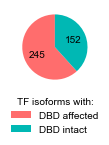

In [239]:
fig = plt.gcf()
fig.set_size_inches(1.5, 1.5)
(df.loc[df['is_DBD']
        & df['alt_iso'].isin(brca_iso), :]
.groupby('alt_iso')
['is_affected'].any()
.value_counts()
.plot.pie(startangle=90,
autopct=lambda x: int(x / 100 * df.loc[df['is_DBD'] & df['alt_iso'].isin(brca_iso), 'alt_iso'].nunique()),
colors=['#FF6D6D', '#00B8B4'],
labels=[' ', ' ']))
plt.legend(labels=['DBD affected', 'DBD intact'],
           title='TF isoforms with:',
           frameon=False,
           loc='upper center',
           bbox_to_anchor=[0.5, 0],
           )
plt.ylabel('')
plt.savefig('../../figures/for_Marthas_CSBC_talk_2020-09-16/DBD-affected_BRCA-TPM-gt-1-GENCODE-TFs_pie.pdf',
            bbox_inches='tight')

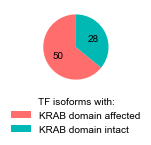

In [240]:
fig = plt.gcf()
fig.set_size_inches(1.5, 1.5)
(df.loc[(df['accession'] == 'PF01352')
        & df['alt_iso'].isin(brca_iso), :]
.groupby('alt_iso')
['is_affected'].any()
.value_counts()
.plot.pie(startangle=90,
autopct=lambda x: int(x / 100 * df.loc[(df['accession'] == 'PF01352') & df['alt_iso'].isin(brca_iso), 'alt_iso'].nunique()),
colors=['#FF6D6D', '#00B8B4'],
labels=[' ', ' ']))
plt.legend(labels=['KRAB domain affected', 'KRAB domain intact'],
           title='TF isoforms with:',
           frameon=False,
           loc='upper center',
           bbox_to_anchor=[0.5, 0],
           )
plt.ylabel('')
plt.savefig('../../figures/for_Marthas_CSBC_talk_2020-09-16/KRAB-affected_BRCA-TPM-gt-1-GENCODE-TFs_pie.pdf',
            bbox_inches='tight')

In [ ]:
import pyranges
from Bio import SeqIO

def load_annotated_brca_tfs():
    path_filtered_gencode_gtf = '../../data_U01/collapse_isoforms_classification.filtered_lite.gtf'
    path_filtered_gencode_fa = '../../data_U01/collapse_isoforms_classification.filtered_lite.fasta'
    # note that pyranges switches the indexing to python indexing,
    # i.e. 0-indexed, half-open interval
    algn = pyranges.read_gtf(path_filtered_gencode_gtf, duplicate_attr=True).df

    algn['gene_id'] = algn['gene_id'].str.replace(r'\..*', '', regex=True)

    algn['transcript_id'] = algn['transcript_id'].str.replace(r'\..*', '', regex=True)


    # remove Y-chromosome copies of PAR region, leaving the X copies
    algn = algn.loc[~(algn['tag'].str.contains('PAR')), :]
    nt_seq = {r.name.split('|')[0].split('.')[0]: r for r in SeqIO.parse(path_filtered_gencode_fa, format='fasta')}
    if not algn['transcript_id'].isin(nt_seq).all():
        missing = algn.loc[~algn['transcript_id'].isin(nt_seq), 'transcript_id'].values
        raise ValueError(', '.join(missing) + ' not in ' + path_filtered_gencode_fa)

    tf_gene_names = set(algn['gene_name'].unique())
    valid_transcipts = set(algn['transcript_name'].unique())
    aa_seqs = defaultdict(dict)
    duplicates = {}
    for record in SeqIO.parse(path_gencode_aa_seq, 'fasta'):
        transcript_name, gene_name = record.name.split('|')[5:7]
        if gene_name not in tf_gene_names or transcript_name not in valid_transcipts:
            continue
        aa_seqs[gene_name][transcript_name] = record.seq
    for gene_transcripts in aa_seqs.values():
        for transcript_name, seq in gene_transcripts.items():
            duplicates[transcript_name] = '|'.join(sorted([k for k, v in gene_transcripts.items()
                                                           if v == seq]))
    unique_pc_transcripts = set([v.split('|')[0] for v in duplicates.values()])

    pfam = load_pfam_domains_gencode()
    genes = {}
    for gene_id in tqdm.tqdm(algn['gene_id'].unique()):
        transcript_ids = algn.loc[algn['gene_id'] == gene_id, 'transcript_id'].unique()
        isoforms = []
        for transcript_id in transcript_ids:
            transcript_name, gene_name = nt_seq[transcript_id].name.split('|')[4:6]
            if transcript_name not in unique_pc_transcripts:
                continue
            exons = []
            columns = ['gene_id', 'transcript_id', 'Chromosome', 'Strand', 'Start', 'End']
            for _i, row in algn.loc[algn['transcript_id'] == transcript_id, columns].iterrows():
                exons.append(isolib.Exon(*row.values))
            isoforms.append(isolib.ORF(transcript_name,
                                       exons,
                                       str(nt_seq[transcript_id].seq),
                                       aa_seq=str(aa_seqs[gene_name][transcript_name]),
                                       ensembl_transcript_id=transcript_id))
        genes[gene_name] = isolib.Gene(gene_name, isoforms)
    pfam['gene_name'] = pfam['query name'].apply(lambda x: '-'.join(x.split('|')[0].split('-')[:-1]))
    for _i, row in pfam.iterrows():
        gene_name = row['gene_name']
        transcript_name = row['query name'].split('|')[0]
        if gene_name not in genes or transcript_name not in genes[gene_name]:
            continue
        genes[gene_name][transcript_name].add_aa_seq_feature(category='Pfam_domain',
                                                             name=row['target name'],
                                                             accession=row['pfam_ac'],
                                                             start=row['env_coord_from'] - 1,
                                                             end=row['env_coord_to'])
    _make_c2h2_zf_arrays(genes)
    _add_dbd_flanks(genes)
    return genes

tfs_new = load_annotated_brca_tfs()